# Chisa: Interactive Crash Course
Welcome to the interactive guide for **Chisa**, the logic-driven dimensional algebra and physics modeling framework. 

Unlike standard conversion libraries, Chisa enforces strict **Type Safety**, supports **Native NumPy Vectorization**, and provides an **Axiom Engine** to model real-world physical limits.

Let's dive into how you can integrate Chisa into your daily workflows! Run the cells below sequentially.

In [ ]:
# Setup the environment
try:
    import chisa
    print(f"Chisa version {chisa.__version__} is ready to go!")
except ImportError:
    print("Installing Chisa...")
    %pip install chisa
    import chisa
    print("Chisa installed successfully!")

## 1. The Fluent API & Native Float Standard
Chisa's Fluent API is designed for Developer Experience (DX). It allows for quick conversions and aesthetic formatting. By default, Chisa strictly returns Python's native `float` (float64) to prevent TypeErrors when integrating with other math libraries.

In [1]:
from chisa import convert

# Aesthetic formatting for UI or Logs
temp_ui = convert(36.5, 'celsius').to('fahrenheit').use(format='verbose', delim=True).resolve()
print("UI Output:", temp_ui)

# Raw extraction for pure math
math_safe_val = convert(10, 'km').to('m').use(format='raw').resolve()
print(f"Math Value: {math_safe_val} (Type: {type(math_safe_val).__name__})")

UI Output: 36.5 c = 97.7 f
Math Value: 10000.0 (Type: float)


## 2. Zero-Bottleneck Vectorization
Chisa does not use slow Python `for`-loops. If you pass a multi-dimensional `numpy.ndarray`, Chisa bypasses scalar logic and delegates the computation directly to NumPy's C-engine. It even preserves your memory-efficient `dtype`.

In [3]:
import numpy as np
from chisa import convert
import time

# Generating 1 million data points using memory-efficient float32
raw_data = np.random.uniform(10.0, 50.0, 1_000_000).astype(np.float32)

start_time = time.time()
# Fully vectorized conversion in a fraction of a second
clean_data = convert(raw_data, 'psi').to('Pa').use(format='raw').resolve()
execution_time = time.time() - start_time

print(f"Processed 1,000,000 rows in {execution_time:.4f} seconds.")
print(f"Input Dtype: {raw_data.dtype} -> Output Dtype: {clean_data.dtype}")

Processed 1,000,000 rows in 0.0055 seconds.
Input Dtype: float32 -> Output Dtype: float32


## 3. Explicit OOP & Dimensional Guardrails
In standard Python, `10.0 + 5.0 = 15.0`, even if you are accidentally adding Meters to Kilograms. Chisa treats units as first-class physical entities and proactively blocks impossible physics logic.

In [4]:
from chisa.units.length import Meter, Kilometer
from chisa.units.mass import Kilogram
from chisa import DimensionMismatchError

# Seamless cross-unit mathematics (Auto-normalized to bases)
distance = Kilometer(2.5) + Meter(500.0)
print(f"Total Distance: {distance.format(tag=True)}")

try:
    print("Attempting to add Length and Mass...")
    impossible_math = distance + Kilogram(5.0)
except DimensionMismatchError as error:
    print(f"Chisa prevented a logic error: {error}")

Total Distance: 3.0 km
Attempting to add Length and Mass...
Chisa prevented a logic error: Dimension mismatch (Addition (+)). Expected 'length', but got 'mass'.


## 4. Building Custom Dimensions (The Axiom Engine)
Chisa is a framework, meaning you can define the rules of reality. Watch how we create a brand new `Density` dimension from scratch. Because Jupyter shares a persistent kernel, once we define this class, it is injected into Chisa's global registry for the rest of this notebook!

In [5]:
from chisa import axiom, BaseUnit
from chisa.units.mass import Kilogram
from chisa.units.length import Meter

@axiom.bound(min_val=0, msg="Density cannot be negative!")
class DensityUnit(BaseUnit):
    dimension = "density"

# Chisa automatically synthesizes the multiplier by dividing Mass by Volume (L^3)
@axiom.derive(mul=[Kilogram], div=[Meter, Meter, Meter])
class KilogramPerCubicMeter(DensityUnit):
    symbol = "kg/m³"

class GramPerCubicCentimeter(DensityUnit):
    symbol = "g/cm³"
    base_multiplier = 1000.0  

# Let's test our new dimension!
water = GramPerCubicCentimeter(1.0)
print(f"Water Density: {water.to(KilogramPerCubicMeter).format(delim=True, tag=True)}")

Water Density: 1,000.0 kg/m³


## 5. Ecosystem Integration (Pandas & Matplotlib)
Because Chisa returns pure NumPy arrays natively, it integrates perfectly into your existing Data Science pipelines without requiring messy data-type conversions.

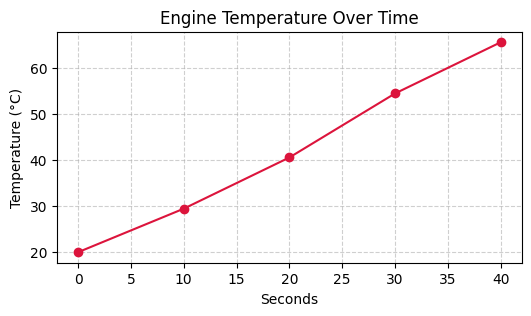

   time_sec  temp_f     temp_c
0         0    68.0  20.000000
1        10    85.0  29.444444
2        20   105.0  40.555556
3        30   130.0  54.444444
4        40   150.0  65.555556


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulating legacy telemetry data
df = pd.DataFrame({
    'time_sec': [0, 10, 20, 30, 40],
    'temp_f': [68.0, 85.0, 105.0, 130.0, 150.0]
})

# Normalize the entire column instantly
df['temp_c'] = convert(df['temp_f'].values, 'F').to('C').use(format='raw').resolve()

# Plotting the normalized data
plt.figure(figsize=(6, 3))
plt.plot(df['time_sec'], df['temp_c'], marker='o', color='crimson')
plt.title('Engine Temperature Over Time')
plt.xlabel('Seconds')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(df.head())